##   R-ൽ Pandas ഉപയോഗം  
  R-ൽ pandas ഉപയോഗം പരിഹരിക്കാൻ dplyr ലൈബ്രറി ഉപയോഗിക്കണം. നാം സാധാരണ ഡാറ്റാ സയൻസ് ലൈബ്രറികൾ ഇറക്കുമതി ചെയ്യുന്നതിൽ നിന്ന് ആരംഭിക്കും.


In [28]:
options(warn=-1)
library(dplyr)
library(tidyverse)
library(lubridate)
library(zoo)
library(xts)
library('ggplot2')

## സീരീസ്


സീരീസ് ഒരു ലിസ്റ്റ് അല്ലെങ്കിൽ 1D-അറേ പോലെയാണ്, പക്ഷേ ഇൻഡക്സ് ഉള്ളത്. എല്ലാ പ്രവർത്തനങ്ങളും ഇൻഡക്സ്-അലൈൻ ചെയ്തതാണ്. R-ൽ ഒരു വരിയുടെ ഇൻഡക്സിംഗ് ചെയ്യാൻ row.names ഉപയോഗിക്കണം.


In [29]:
a<- 1:9

In [30]:
b = c("I","like","to","use","Python","and","Pandas","very","much")

In [31]:
a1 = length(a)
b1 = length(b)

In [32]:
a = data.frame(a,row.names = c(1:a1))
print(a)

  a
1 1
2 2
3 3
4 4
5 5
6 6
7 7
8 8
9 9


In [33]:
b = data.frame(b,row.names = c(1:b1))
print(b)

       b
1      I
2   like
3     to
4    use
5 Python
6    and
7 Pandas
8   very
9   much


സീരീസുകളുടെ പതിവായ ഉപയോഗങ്ങളിൽ ഒന്നാണ് ടൈം സീരീസ്. ടൈം സീരീസിൽ, ഇൻഡക്സിന് പ്രത്യേക ഘടനയുണ്ട് - സാധാരണയായി തീയതികളോ ഡേറ്റൈമുകളോ ഉള്ള ഒരു പരിധി. ts ഫംഗ്ഷൻ ഉപയോഗിച്ച് ടൈം സീരീസ് സൃഷ്ടിക്കുന്നത് ഏറ്റവും എളുപ്പമാണ്. എന്നാൽ ടൈം സീരീസ് നടപ്പിലാക്കാൻ മറ്റൊരു മാർഗം ശ്രമിക്കാം. seq ഫംഗ്ഷൻ ഉപയോഗിച്ച് തീയതികളുടെ ഇൻഡക്സ് സൃഷ്ടിക്കാൻ ഞങ്ങൾക്ക് lubridate ലൈബ്രറി ഉപയോഗിക്കേണ്ടതുണ്ട്.

നമുക്ക് ഒരു സീരീസ് ഉണ്ടെന്ന് കരുതുക, അത് ഓരോ ദിവസവും വാങ്ങിയ ഉൽപ്പന്നത്തിന്റെ അളവ് കാണിക്കുന്നു, കൂടാതെ ഞങ്ങൾ അറിയുന്നു ഓരോ ഞായറാഴ്ചയും ഞങ്ങൾക്കായി ഒരു അധിക ഇനം എടുത്ത് വെക്കേണ്ടതുണ്ട്. സീരീസ് ഉപയോഗിച്ച് ഇത് മോഡൽ ചെയ്യുന്നത് ഇങ്ങനെ ആണ്:


In [34]:
# We will use ggplot2 for visualizing the data
# If you want to change the plot size repr library will be used
library(repr)
options(repr.plot.width = 12,repr.plot.height=6)

[1] "length of index is  366"


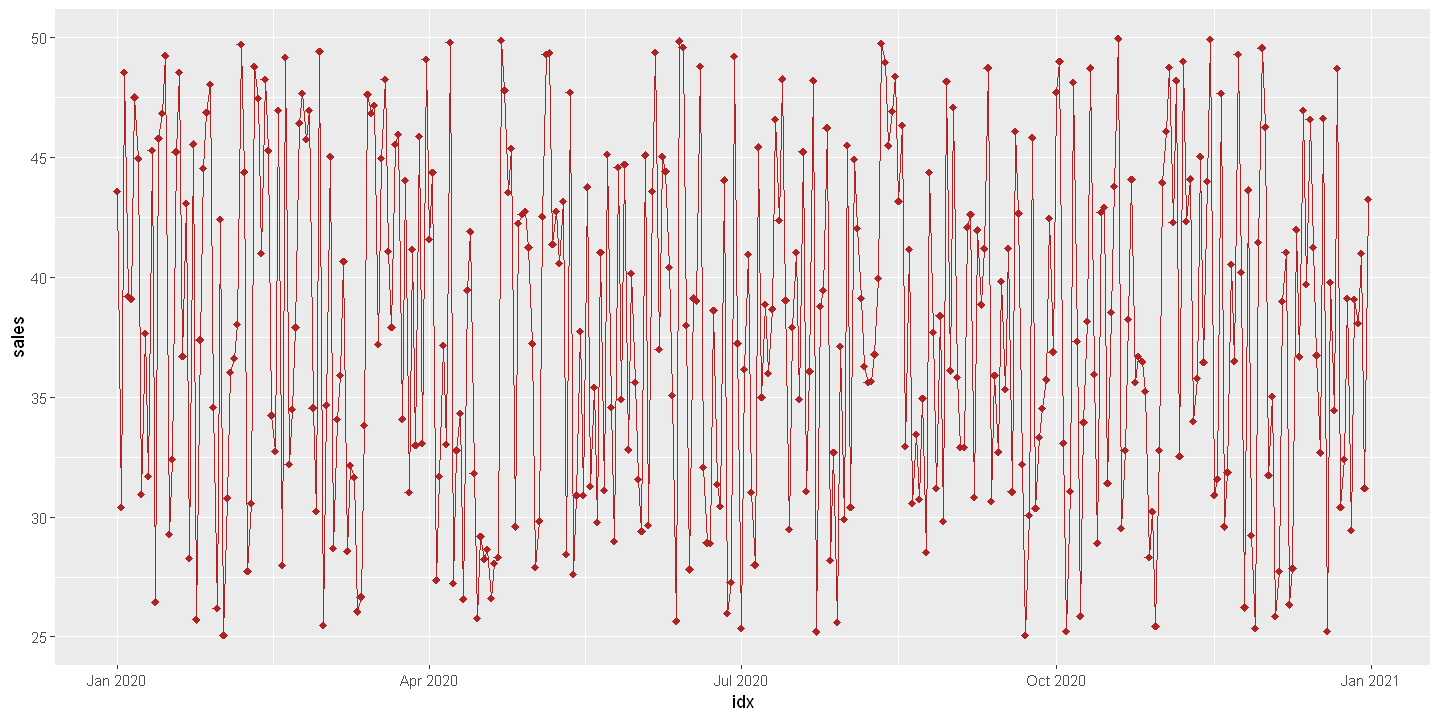

In [35]:
start_date <- mdy("Jan 1, 2020")
end_date <- mdy("Dec 31, 2020")
idx = seq(start_date,end_date,by ='day')
print(paste("length of index is ",length(idx)))
size = length(idx)
sales = runif(366,min=25,max=50)
sold_items <- data.frame(row.names=idx[0:size],sales)
ggplot(sold_items,aes(x=idx,y=sales)) + geom_point(color = "firebrick", shape = "diamond", size = 2) +
    geom_line(color = "firebrick", size = .3)

നാം total no of products കണ്ടെത്താൻ additional_items ഉം sold_items ഉം മർജ്ജ് ചെയ്യുകയാണ്.  
നിങ്ങൾക്ക് കാണാമല്ലോ, total കണ്ടെത്തുന്നതിൽ പ്രശ്നങ്ങൾ ഉണ്ടാകുന്നു, weekly series ൽ പരാമർശിക്കാത്ത ദിവസങ്ങൾ നഷ്ടപ്പെട്ട (NaN) ആയി കണക്കാക്കപ്പെടുന്നു, NaN ഒരു സംഖ്യയിലേക്ക് കൂട്ടിച്ചേർക്കുമ്പോൾ NaN ലഭിക്കുന്നു.  
കൂട്ടിച്ചേർക്കാൻ, NaN നെ 0 ആയി മാറ്റേണ്ടതുണ്ട്.


In [36]:
index = seq(start_date,end_date,by = 'week')
sz = length(index)
additional_product <- rep(10,53)
additional_items  <- data.frame(row.names = index[0:sz],additional_product)
additional_items
# we are merging two dataframe so that we can add
additional_item = merge(additional_items,sold_items, by = 0, all = TRUE)[-1] 
total  = data.frame(row.names=idx[0:size],additional_item$additional_product + additional_item$sales)
colnames(total) =  c('total')
total

additional_product
2020-01-01 10                
2020-01-08 10                
2020-01-15 10                
2020-01-22 10                
2020-01-29 10                
2020-02-05 10                
2020-02-12 10                
2020-02-19 10                
2020-02-26 10                
2020-03-04 10                
2020-03-11 10                
2020-03-18 10                
2020-03-25 10                
2020-04-01 10                
2020-04-08 10                
2020-04-15 10                
2020-04-22 10                
2020-04-29 10                
2020-05-06 10                
2020-05-13 10                
2020-05-20 10                
2020-05-27 10                
2020-06-03 10                
2020-06-10 10                
2020-06-17 10                
2020-06-24 10                
2020-07-01 10                
2020-07-08 10                
2020-07-15 10                
2020-07-22 10                
2020-07-29 10                
2020-08-05 10                
2020-08-12 10                
2020-08-19 10                
2020-08-26 10                
2020-09-02 10                
2020-09-09 10                
2020-09-16 10                
2020-09-23 10                
2020-09-30 10                
2020-10-07 10                
2020-10-14 10                
2020-10-21 10                
2020-10-28 10                
2020-11-04 10                
2020-11-11 10                
2020-11-18 10                
2020-11-25 10                
2020-12-02 10                
2020-12-09 10                
2020-12-16 10                
2020-12-23 10                
2020-12-30 10

total   
2020-01-01 53.59979
2020-01-02       NA
2020-01-03       NA
2020-01-04       NA
2020-01-05       NA
2020-01-06       NA
2020-01-07       NA
2020-01-08 40.93455
2020-01-09       NA
2020-01-10       NA
2020-01-11       NA
2020-01-12       NA
2020-01-13       NA
2020-01-14       NA
2020-01-15 59.24704
2020-01-16       NA
2020-01-17       NA
2020-01-18       NA
2020-01-19       NA
2020-01-20       NA
2020-01-21       NA
2020-01-22 38.26416
2020-01-23       NA
2020-01-24       NA
2020-01-25       NA
2020-01-26       NA
2020-01-27       NA
2020-01-28       NA
2020-01-29 44.58327
2020-01-30       NA
...        ...     
2020-12-02 41.74811
2020-12-03       NA
2020-12-04       NA
2020-12-05       NA
2020-12-06       NA
2020-12-07       NA
2020-12-08       NA
2020-12-09 37.85650
2020-12-10       NA
2020-12-11       NA
2020-12-12       NA
2020-12-13       NA
2020-12-14       NA
2020-12-15       NA
2020-12-16 46.73560
2020-12-17       NA
2020-12-18       NA
2020-12-19       NA
2020-12-20       NA
2020-12-21       NA
2020-12-22       NA
2020-12-23 40.42143
2020-12-24       NA
2020-12-25       NA
2020-12-26       NA
2020-12-27       NA
2020-12-28       NA
2020-12-29       NA
2020-12-30 41.20298
2020-12-31       NA

In [37]:
additional_item[is.na(additional_item)] = 0
total  = data.frame(row.names=idx[0:size],additional_item$additional_product + additional_item$sales)
colnames(total) =  c('total')
total

total   
2020-01-01 53.59979
2020-01-02 30.41127
2020-01-03 48.54839
2020-01-04 39.20897
2020-01-05 39.09894
2020-01-06 47.53019
2020-01-07 44.94766
2020-01-08 40.93455
2020-01-09 37.66561
2020-01-10 31.68825
2020-01-11 45.30576
2020-01-12 26.45509
2020-01-13 45.81249
2020-01-14 46.84547
2020-01-15 59.24704
2020-01-16 29.28688
2020-01-17 32.41731
2020-01-18 45.23295
2020-01-19 48.54330
2020-01-20 36.69353
2020-01-21 43.09588
2020-01-22 38.26416
2020-01-23 45.56863
2020-01-24 25.70944
2020-01-25 37.38721
2020-01-26 44.53955
2020-01-27 46.88427
2020-01-28 48.05540
2020-01-29 44.58327
2020-01-30 26.19490
...        ...     
2020-12-02 41.74811
2020-12-03 35.03915
2020-12-04 25.84637
2020-12-05 27.73147
2020-12-06 39.00993
2020-12-07 41.03187
2020-12-08 26.33862
2020-12-09 37.85650
2020-12-10 41.98943
2020-12-11 36.68901
2020-12-12 46.96883
2020-12-13 39.70374
2020-12-14 46.59464
2020-12-15 41.24742
2020-12-16 46.73560
2020-12-17 32.68275
2020-12-18 46.64238
2020-12-19 25.22163
2020-12-20 39.79997
2020-12-21 34.45013
2020-12-22 48.71183
2020-12-23 40.42143
2020-12-24 32.41991
2020-12-25 39.12296
2020-12-26 29.43616
2020-12-27 39.09337
2020-12-28 38.09288
2020-12-29 41.00681
2020-12-30 41.20298
2020-12-31 43.25232

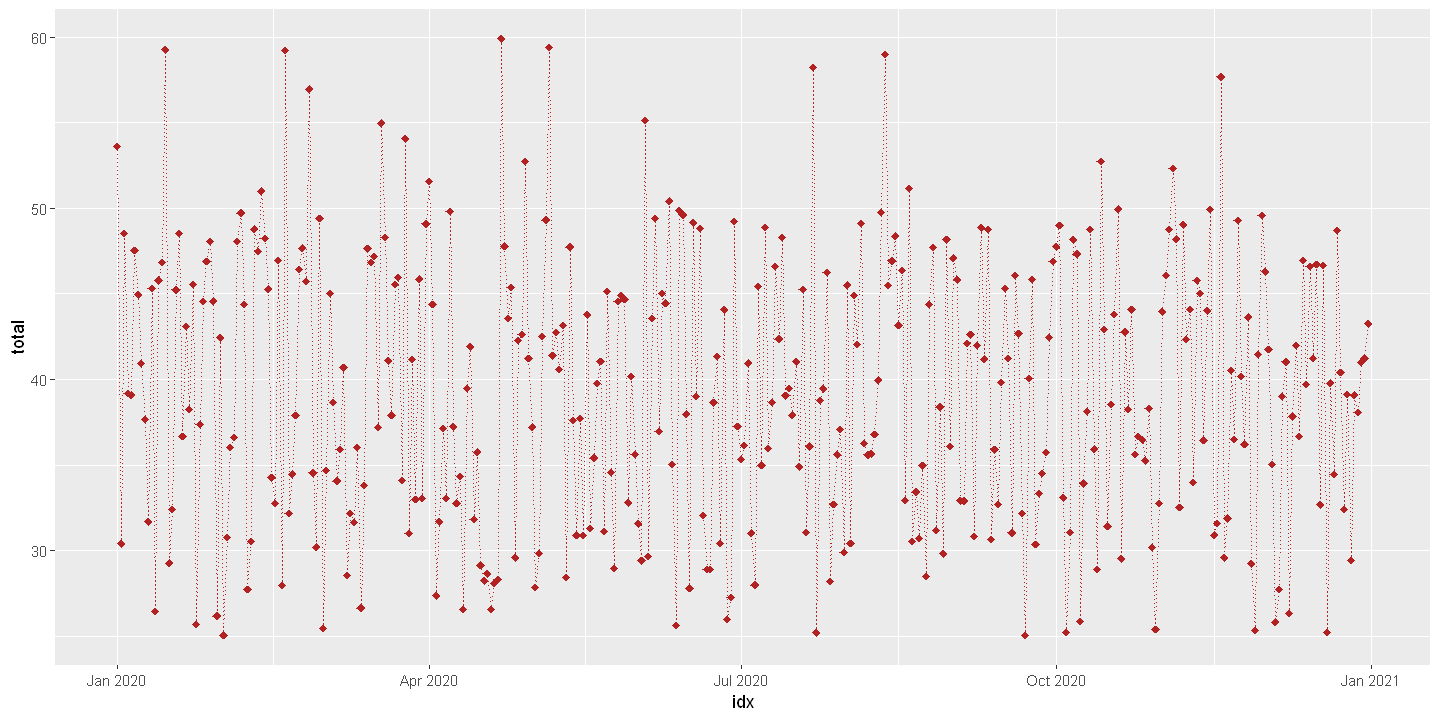

In [38]:
ggplot(total,aes(x=idx,y=total)) + geom_point(color = "firebrick", shape = "diamond", size = 2) +
    geom_line(color = "firebrick", linetype = "dotted", size = .3)

നാം മാസാന്ത്യ അടിസ്ഥാനത്തിൽ മൊത്തം ഉൽപ്പന്നങ്ങളുടെ എണ്ണം വിശകലനം ചെയ്യാൻ ആഗ്രഹിക്കുന്നു. അതിനാൽ, ഒരു മാസത്തിലെ മൊത്തം ഉൽപ്പന്നങ്ങളുടെ ശരാശരി കണ്ടെത്തി ഒരു ബാർഗ്രാഫ് വരയ്ക്കുന്നു.


In [39]:
index = seq(start_date,end_date,by ='month')


              total
2020-01-31 41.03847
2020-02-29 40.91568
2020-03-31 39.27424
2020-04-30 37.63589
2020-05-31 38.75129
2020-06-30 38.75744
2020-07-31 38.35212
2020-08-31 40.43712
2020-09-30 38.90043
2020-10-31 37.99855
2020-11-30 41.20759
2020-12-31 38.46355

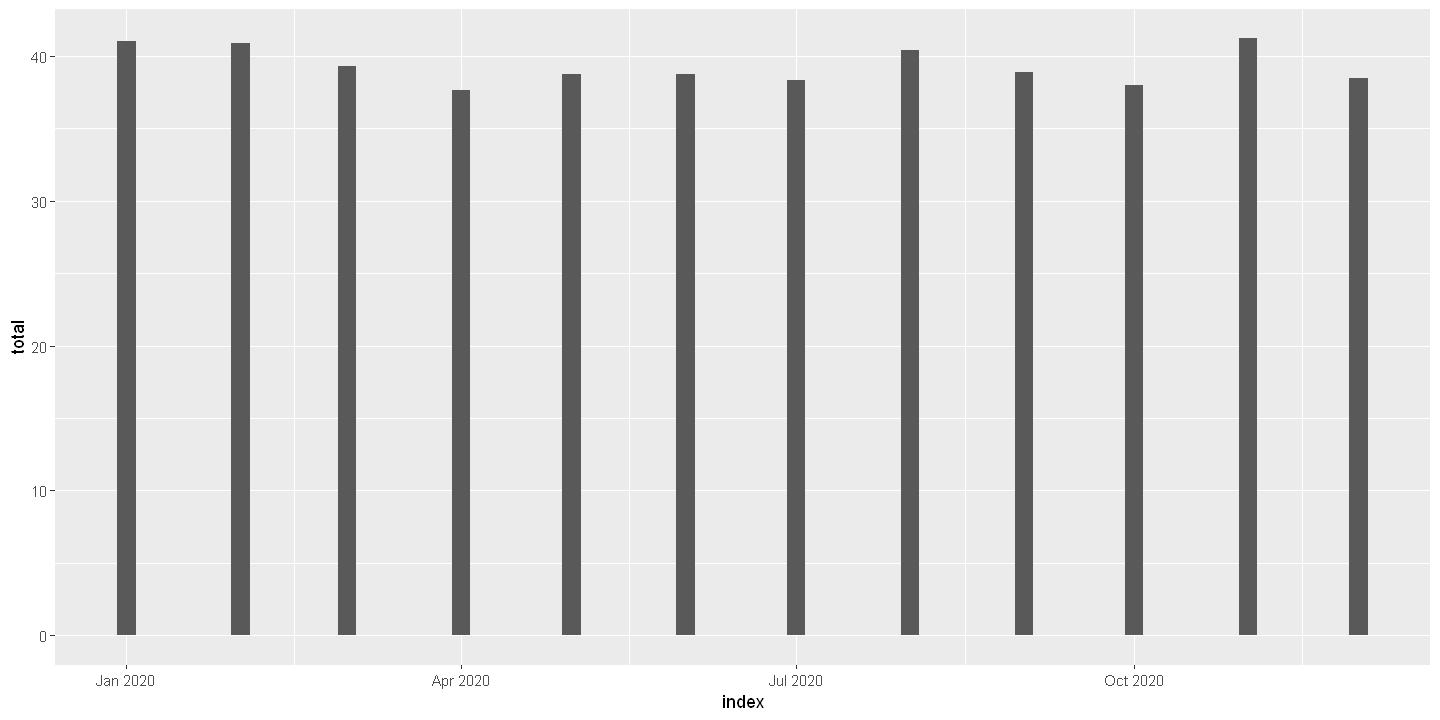

In [40]:
x<- as.xts(total, dateFormat ="Date")
(monthly<-apply.monthly(x,mean))
ggplot(monthly, aes(x=index, y=total)) + 
  geom_bar(stat = "identity", width=5) 

## DataFrame
ഡാറ്റാഫ്രെയിം അടിസ്ഥാനപരമായി ഒരേ ഇൻഡക്സ് ഉള്ള സീരീസുകളുടെ ഒരു ശേഖരമാണ്. നാം പല സീരീസുകളെയും ചേർത്ത് ഒരു ഡാറ്റാഫ്രെയിം ഉണ്ടാക്കാം.  
ഉദാഹരണത്തിന്, നാം a, b സീരീസുകളുടെ ഡാറ്റാഫ്രെയിം ഉണ്ടാക്കുകയാണ്.


In [41]:
a = data.frame(a,row.names = c(1:a1))

In [42]:
b = data.frame(b,row.names = c(1:b1))

In [43]:
df<- data.frame(a,b)
df

a b     
1 1 I     
2 2 like  
3 3 to    
4 4 use   
5 5 Python
6 6 and   
7 7 Pandas
8 8 very  
9 9 much

നാം rename ഫംഗ്ഷൻ ഉപയോഗിച്ച് കോളം നാമം മാറ്റാനും കഴിയും


In [44]:
df = 
  rename(df,
    A = a,
    B = b,
  )

In [45]:
df

A B     
1 1 I     
2 2 like  
3 3 to    
4 4 use   
5 5 Python
6 6 and   
7 7 Pandas
8 8 very  
9 9 much

നാം select ഫംഗ്ഷൻ ഉപയോഗിച്ച് ഒരു ഡാറ്റാഫ്രെയിമിൽ ഒരു കോളം തിരഞ്ഞെടുക്കാനും കഴിയും


In [46]:
cat("Column A (series):\n")
select(df,'A')

Column A (series):


A
1 1
2 2
3 3
4 4
5 5
6 6
7 7
8 8
9 9

നാം സീരീസിൽ ഒരു നിശ്ചിത തർക്കപരമായ മാനദണ്ഡം പാലിക്കുന്ന വരികൾ എടുക്കും


In [47]:
df[df$A<5,]

A B   
1 1 I   
2 2 like
3 3 to  
4 4 use

In [48]:
df[df$A>5 & df$A<7,]

A B  
6 6 and

പുതിയ കോളങ്ങൾ സൃഷ്ടിക്കുന്നു.

താഴെ കൊടുത്തിരിക്കുന്ന കോഡ് ഒരു സീരീസ് സൃഷ്ടിക്കുന്നു, അത് a യുടെ ശരാശരി മൂല്യത്തിൽ നിന്നുള്ള വ്യത്യാസം കണക്കാക്കുന്നു, പിന്നീട് നിലവിലുള്ള ഡാറ്റാഫ്രെയിമിൽ മർജ് ചെയ്യുന്നു.


In [49]:
df$DivA <- df$A - mean(df$A)

In [50]:
df

A B      DivA
1 1 I      -4  
2 2 like   -3  
3 3 to     -2  
4 4 use    -1  
5 5 Python  0  
6 6 and     1  
7 7 Pandas  2  
8 8 very    3  
9 9 much    4

നാം ഒരു സീരീസ് സൃഷ്ടിക്കുന്നു, അത് A കോളത്തിലെ സ്ട്രിംഗിന്റെ നീളം കണക്കാക്കി പിന്നീട് നിലവിലുള്ള ഡാറ്റാഫ്രെയിമിൽ മർജ് ചെയ്യുന്നു.


In [51]:
df$LenB <- str_length(df$B)

In [52]:
df

A B      DivA LenB
1 1 I      -4   1   
2 2 like   -3   4   
3 3 to     -2   2   
4 4 use    -1   3   
5 5 Python  0   6   
6 6 and     1   3   
7 7 Pandas  2   6   
8 8 very    3   4   
9 9 much    4   4

സംഖ്യകളുടെ അടിസ്ഥാനത്തിൽ വരികൾ തിരഞ്ഞെടുക്കൽ


In [53]:
df[0:5,]

A B      DivA LenB
1 1 I      -4   1   
2 2 like   -3   4   
3 3 to     -2   2   
4 4 use    -1   3   
5 5 Python  0   6

***ഗ്രൂപ്പിംഗ് എന്നത് ചില നിബന്ധനകളുടെ അടിസ്ഥാനത്തിൽ പല കോളങ്ങളെയും ഗ്രൂപ്പ് ചെയ്യുന്നതാണ്, വ്യത്യാസം കാണാൻ summarise ഫംഗ്ഷൻ ഉപയോഗിക്കും***

ഉദാഹരണത്തിന്, ഓരോ നൽകിയ LenB സംഖ്യയ്ക്കും കോളം A യുടെ ശരാശരി മൂല്യം കണക്കാക്കണമെന്ന് ആഗ്രഹിക്കുകയാണെങ്കിൽ, ഞങ്ങൾ നമ്മുടെ DataFrame LenB പ്രകാരം ഗ്രൂപ്പ് ചെയ്ത് ശരാശരി കണ്ടെത്തി അവയെ a എന്ന പേരിൽ നാമകരണം ചെയ്യാം


In [54]:
df1 = df %>% group_by(LenB) %>% summarise(a = mean(A))

In [55]:
df1

LenB a       
1 1    1.000000
2 2    3.000000
3 3    5.000000
4 4    6.333333
5 6    6.000000

In [56]:
df2 = df %>% group_by(LenB) %>%
summarise(MEAN = mean(A),count =length(DivA))

## Printing and Plotting
When We call head(df)  it will print out dataframe in a tabular form.

ഏതെങ്കിലും ഡാറ്റാ സയൻസ് പ്രോജക്ടിന്റെ ആദ്യപടി ഡാറ്റാ ക്ലീനിംഗ് ആയും ദൃശ്യവൽക്കരണവും ആയും ആണ്, അതിനാൽ ഡാറ്റാസെറ്റ് ദൃശ്യവൽക്കരിക്കുകയും ചില ഉപകാരപ്രദമായ വിവരങ്ങൾ എടുക്കുകയും ചെയ്യുന്നത് പ്രധാനമാണ്.


In [57]:
#dataset = read.csv("file name")

In [58]:
head(df)

A B      DivA LenB
1 1 I      -4   1   
2 2 like   -3   4   
3 3 to     -2   2   
4 4 use    -1   3   
5 5 Python  0   6   
6 6 and     1   3

ggplot2 ഒരു വളരെ നല്ല ലൈബ്രറിയാണ് കാരണം ഇത് ഡാറ്റാ ഫ്രെയിമിലുള്ള ഡാറ്റയിൽ നിന്ന് സങ്കീർണ്ണമായ പ്ലോട്ടുകൾ സൃഷ്ടിക്കാൻ എളുപ്പമാണ്.

എന്ത് വേരിയബിളുകൾ പ്ലോട്ട് ചെയ്യണമെന്ന്, അവ എങ്ങനെ പ്രദർശിപ്പിക്കപ്പെടണം, പൊതുവായ ദൃശ്യ ഗുണങ്ങൾ എന്നിവ വ്യക്തമാക്കാൻ ഇത് കൂടുതൽ പ്രോഗ്രാമാറ്റിക് ഇന്റർഫേസ് നൽകുന്നു.


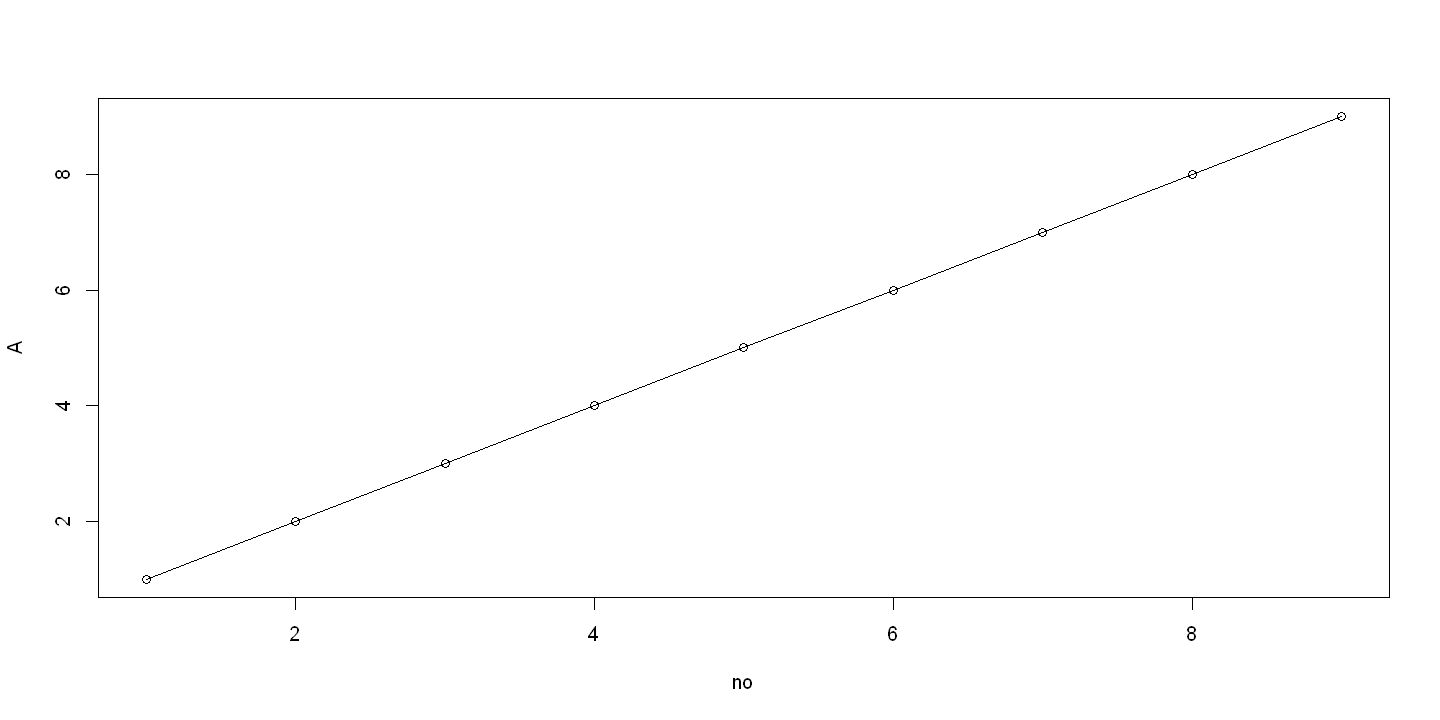

In [59]:
plot(df$A,type = 'o',xlab = "no",ylab = "A")

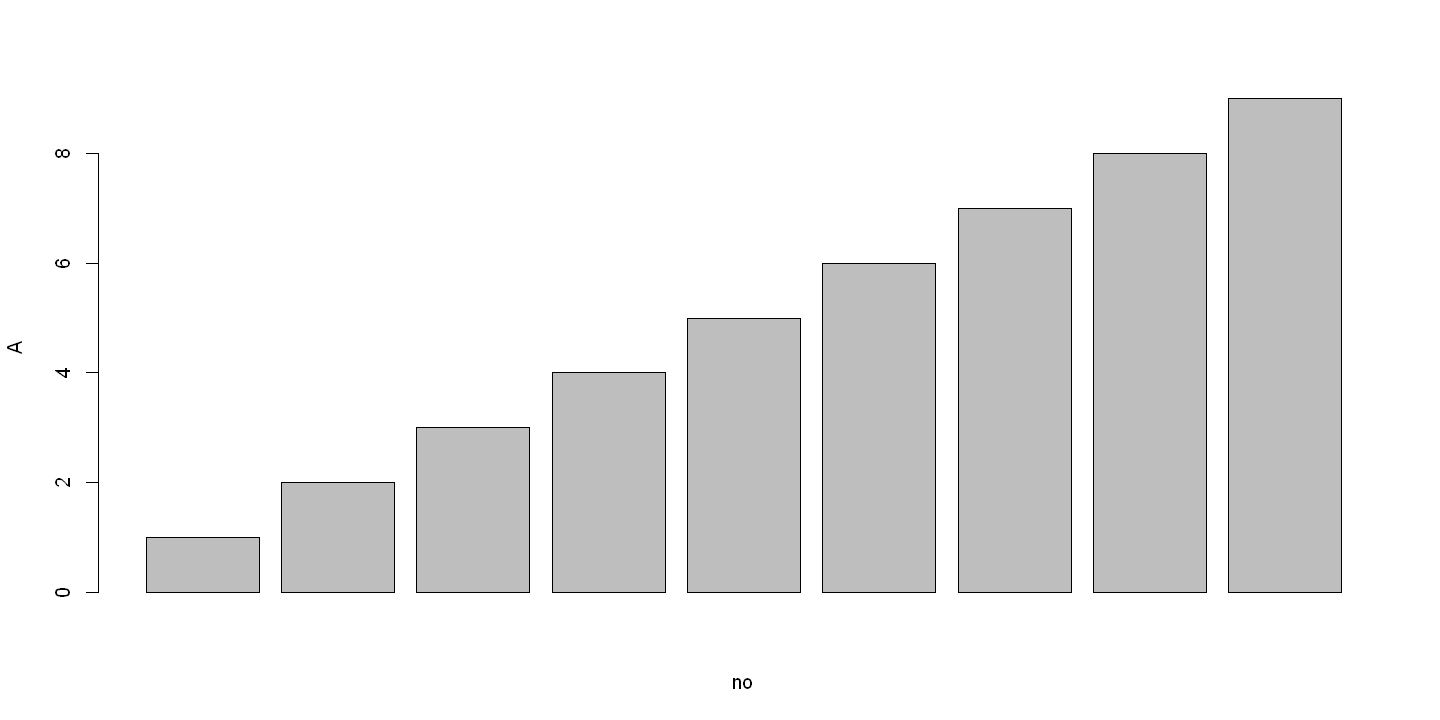

In [60]:
barplot(df$A, ylab = 'A',xlab = 'no')

---

<!-- CO-OP TRANSLATOR DISCLAIMER START -->
**അസൂയാ**:  
ഈ രേഖ AI വിവർത്തന സേവനം [Co-op Translator](https://github.com/Azure/co-op-translator) ഉപയോഗിച്ച് വിവർത്തനം ചെയ്തതാണ്. നാം കൃത്യതയ്ക്ക് ശ്രമിച്ചിട്ടുണ്ടെങ്കിലും, സ്വയം പ്രവർത്തിക്കുന്ന വിവർത്തനങ്ങളിൽ പിശകുകൾ അല്ലെങ്കിൽ തെറ്റുകൾ ഉണ്ടാകാമെന്ന് ദയവായി ശ്രദ്ധിക്കുക. അതിന്റെ മാതൃഭാഷയിലുള്ള യഥാർത്ഥ രേഖയാണ് പ്രാമാണികമായ ഉറവിടം എന്ന് പരിഗണിക്കേണ്ടതാണ്. നിർണായകമായ വിവരങ്ങൾക്ക്, പ്രൊഫഷണൽ മനുഷ്യ വിവർത്തനം ശുപാർശ ചെയ്യപ്പെടുന്നു. ഈ വിവർത്തനം ഉപയോഗിക്കുന്നതിൽ നിന്നുണ്ടാകുന്ന ഏതെങ്കിലും തെറ്റിദ്ധാരണകൾക്കോ തെറ്റായ വ്യാഖ്യാനങ്ങൾക്കോ ഞങ്ങൾ ഉത്തരവാദികളല്ല.
<!-- CO-OP TRANSLATOR DISCLAIMER END -->
